IMPORTAR TODO LO QUE NECESITAMOS:

In [60]:
import pandas as pd
from pathlib import Path
from plotnine import ggplot, aes, geom_bar, scale_y_continuous, coord_flip
import plotnine as pn
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from IPython.display import display
import seaborn as sns
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



CREAR EL DATAFRAME CON LOS DATOS DE LOS USUARIOS DE TWITTER

Vemos que hay algunas filas que tienen valores nulos en todas sus columnas, al igual que columnas que todos o la mayoria de sus filas son nulas.

In [61]:
twitter_users = pd.read_csv("Datos/handles_data.csv")

display(twitter_users)

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image;;
0,"409486555,Michelle Obama,MichelleObama,""Girl f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19397785,Oprah Winfrey,Oprah,NaN,https://t.co/IKOnfAha8E,2009-01-23 15:18:34 UTC,2009-01-23,15:18:34 UTC,13388.0,NaN,323.0,43197469.0,224,951,False,True,https://pbs.twimg.com/profile_images/112335936...,https://pbs.twimg.com/profile_banners/19397785...
2,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420.0,NaN,235.0,108819032.0,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
3,14230524,Lady Gaga,ladygaga,“Chromatica” ⚔️💓 OUT NOW https://t.co/dgVb2x2V...,https://t.co/r5yRJxteLd,2008-03-26 22:37:48 UTC,2008-03-26,22:37:48 UTC,9519.0,NaN,119314.0,83675119.0,2310,1795,False,True,https://pbs.twimg.com/profile_images/142258922...,https://pbs.twimg.com/profile_banners/14230524...
4,"16409683,Britney Spears,britneyspears,,https:/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,"Abdullah bin AlHussein, King of Jordan"",https:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1361,109226167,Mevlüt Çavuşoğlu,MevlutCavusoglu,T.C. Dışişleri Bakanı / Minister of Foreign Af...,https://t.co/XfLchcygHX,2010-01-28 10:50:37 UTC,2010-01-28,10:50:37 UTC,21185.0,NaN,126.0,2011441.0,2314,11365,False,True,https://pbs.twimg.com/profile_images/118200880...,https://pbs.twimg.com/profile_banners/10922616...
1362,444465942,문재인,moonriver365,대한민국 대통령 문재인입니다. President of the Republic of ...,https://t.co/FAKWOwyhHd,2011-12-23 08:46:08 UTC,2011-12-23,08:46:08 UTC,4216.0,대한민국,141040.0,1869489.0,720,2003,False,True,https://pbs.twimg.com/profile_images/798463233...,https://pbs.twimg.com/profile_banners/44446594...
1363,17481977,GOV.UK,GOVUK,Official Twitter channel providing support for...,https://t.co/4KBh38vztU,2008-11-19 07:25:05 UTC,2008-11-19,07:25:05 UTC,19867.0,UK,680.0,1849529.0,152,869,False,True,https://pbs.twimg.com/profile_images/141050879...,https://pbs.twimg.com/profile_banners/17481977...


INFORMACIÓN ESTADÍSTICA DE CADA COLUMNA

Vemos que en los 3 el min es -1, lo que podría significar datos faltantes o errores.

También se aprecia que la desviación es alta en las 3 columnas, mostrando uan variabilidad significativa en la cantidad de twets, seguidores y seguidos.

Esto puede afectar ya que puede hacer que las predicciones basadas en la media sean menos precisas, ya que los valores individuales puden estar más alejados de la media.


In [62]:
twitter_users.describe()

,tweets,following,followers
count,668.000000,6.680000e+02,6.680000e+02
mean,22163.299401,7.355079e+03,9.133657e+06
std,44869.612644,6.775523e+04,1.401980e+07
min,-1.000000,-1.000000e+00,-1.000000e+00
25%,2732.750000,8.675000e+01,2.634698e+06
50%,9212.500000,3.960000e+02,4.538146e+06
75%,23123.250000,1.041750e+03,9.488501e+06
max,443030.000000,1.419893e+06,1.139276e+08


Vemos que la mayoria de las columnas son de tipo objecto y solo tenemos 3 columnas númericas.

In [63]:
twitter_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1365 non-null   object 
 1   name                652 non-null    object 
 2   username            651 non-null    object 
 3   bio                 554 non-null    object 
 4   url                 505 non-null    object 
 5   join_datetime       668 non-null    object 
 6   join_date           651 non-null    object 
 7   join_time           650 non-null    object 
 8   tweets              668 non-null    float64
 9   location            350 non-null    object 
 10  following           668 non-null    float64
 11  followers           668 non-null    float64
 12  likes               668 non-null    object 
 13  media               668 non-null    object 
 14  private             651 non-null    object 
 15  verified            651 non-null    object 
 16  avatar

VER SI HAY NULOS

Procedemos a ver lo valores nulos y vemos que en todas las columnas, excepto la de id hay valores nulos

In [64]:
twitter_users.isnull().sum()

id                       0
name                   713
username               714
bio                    811
url                    860
join_datetime          697
join_date              714
join_time              715
tweets                 697
location              1015
following              697
followers              697
likes                  697
media                  697
private                714
verified               714
avatar                 718
background_image;;     701
dtype: int64

VEMOS QUE FILAS TIENEN LA VARIABLE NAME NULA

In [65]:
twitter_users[twitter_users['username'].isnull()]

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image;;
0,"409486555,Michelle Obama,MichelleObama,""Girl f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"16409683,Britney Spears,britneyspears,,https:/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"26565946,Justin Timberlake,jtimberlake,,https:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,"21111098,Richard Shelby,SenShelby,The official...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"941080085121175552,Archived: Senator Doug Jone...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,"441636351,Arindam Bagchi,MEAIndia,""Official Sp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1354,"77653794,Iván Duque 🇨🇴,IvanDuque,""Presidente d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1359,"841211876776259585,عبدالله بن الحسين,KingAbdul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1360,"Abdullah bin AlHussein, King of Jordan"",https:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


BORRAMOS ESTAS FILAS

In [66]:
df_sin_null_name = twitter_users.dropna(subset=['username'])

In [67]:
df_sin_null_name[df_sin_null_name['name'].isnull()]

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image;;


ESCOGER COLUMNAS

Name y UserName

La columna "Name", la podemos eliminar, ya que no nos proporcionara un gran cambio en nuestro modelo debido a que  utilizaremos el id del usuario.

####################################################################################################################

BIO

La columna "Bio" podría carecer de valor distintivo, ya que las biografías varían entre usuarios populares y comunes; los famosos tienden a tener biografías concisas, mientras que los usuarios comunes tienen descripciones más personales.

####################################################################################################################

Url

Normalmente la url no nos aportara nada, ya que la mayoria de famosos en la plataforma ponen sus paginas o el link de sus tiendas por lo que estara relacionado si es famoso o no, es decir las personas del común normalmente no tienen paginas.

####################################################################################################################

join_datetime, join_date y join_time

Las columnas  join_datetime, join_date y  join_time hacen referencia a la fecha en que se unión el usuario, pero no debería ser muy relevante para el modelo de clasificación, ya que puede haber gente que se ha unido hace poco y generar tweets más virales que gente que lleva 10 años en la plataforma

####################################################################################################################

avatar  y background_image 

Son dos columnas que no significan nada relevante respecto al proposito del modelo, no tienen ninguna relación.

####################################################################################################################

location 

La ubicación no aportaría nada relevante porque no hay un patron en concreto que argumente alguna relación con el objetvo

####################################################################################################################

private

Si un perfil es privado, no es común que sus tweets sean populares, ya que solo lo pueden ver sus seguidores y nadie más.

####################################################################################################################

ELEGIMOS LAS SIGUIENTES VARIABLES:

id          --- > El id de usuario podría ser útil para identificar y seguir a ciertos usuarios en particular.

tweets      --- > La cantidad de tweets podría ser un indicador de la actividad del usuario. Un usuario activo podría tener más probabilidades de generar tweets virales.

following   ----
                |
                V           

followers   --- >La relación entre seguidores y seguidos podría proporcionar información sobre la influencia del usuario en la 

plataforma.

likes       --- > La cantidad de "me gusta" en los tweets anteriores podría ser un indicador de la popularidad del usuario.

verified    --- > La verificación de la cuenta podría indicar autenticidad y posiblemente influencia.

media       --- > La presencia de contenido multimedia (imágenes, videos) en los tweets podría aumentar la probabilidad de que un tweet sea viral.


Cambiamos los valores de verified por 0 y 1

In [68]:
df_sin_null_name['verified'].unique()

array(['True', 'False',
       'https://pbs.twimg.com/profile_banners/145125358/1560199367";',
       'https://pbs.twimg.com/profile_banners/45266183/1610397625";',
       'https://pbs.twimg.com/profile_banners/107120856/1545228661";'],
      dtype=object)

In [69]:
# Supongamos que tu DataFrame se llama df
df_sin_null_name['verified'] = df_sin_null_name['verified'].map({'True': 1, 'False': 0})
df_sin_null_name['verified'] = df_sin_null_name['verified'].fillna(0)  # Para manejar los valores NaN, se asigna 0


C:\Users\jesus\AppData\Local\Temp\ipykernel_28180\476660633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jesus\AppData\Local\Temp\ipykernel_28180\476660633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [70]:
New_twitter_users= df_sin_null_name[['id','tweets','following', 'followers', 'likes','media']]

New_twitter_users.head(10)

,id,tweets,following,followers,likes,media
1,19397785,13388.0,323.0,43197469.0,224,951
2,21447363,11420.0,235.0,108819032.0,7995,2170
3,14230524,9519.0,119314.0,83675119.0,2310,1795
6,35787166,42231.0,5767.0,22418403.0,88497,3149
7,19248106,10252.0,188.0,21612341.0,4346,2504
8,28706024,8070.0,467.0,31648347.0,865,830
9,34507480,46950.0,55953.0,83945661.0,43968,3936
10,27260086,31363.0,287772.0,113927565.0,4600,2741
11,23375688,5238.0,1078.0,64999860.0,1807,1006
12,268414482,11804.0,396.0,46344092.0,1340,3759


In [71]:
New_twitter_users.isnull().sum()

id           0
tweets       0
following    0
followers    0
likes        0
media        0
dtype: int64

In [72]:
New_twitter_users['id'].unique()

array(['19397785', '21447363', '14230524', '35787166', '19248106',
       '28706024', '34507480', '27260086', '23375688', '268414482',
       '2891210047', '968650362', '476256944', '235217558', '150078976',
       '2863210809', '92186819', '1096059529', '247334603', '234128524',
       '1383059977', '18632666', '816683274076614656', '1068481578',
       '236511574', '33537967', '21269970', '515822213', '1071402577',
       '811313565760163844', '266133081', '18915145', '7270292',
       '250188760', '221162525', '283130017', '88784440', '291756142',
       '79293791', '18839785', '25365536', '783214', '44196397', '759251',
       '44409004', '807095', '23083404', '11348282',
       '145125358,Amitabh Bachchan,SrBachchan,"""तुमने हमें पूज पूज कर पत्थर कर डाला ;" वे जो हमपर जुमले कसते हैं हमें ज़िंदा तो समझते हैं """"~  हरिवंश राय  बच्चन""',
       '471741741', '100220864', '71201743', '101311381', '31348594',
       '27195114', '236699098', '335141638', '26257166', '96951800',
       '

Quitamos los valores que son texto:

In [73]:
New_twitter_users = New_twitter_users[pd.to_numeric(New_twitter_users['id'], errors='coerce').notna() | New_twitter_users['id'].str.isnumeric()]

In [74]:
New_twitter_users['id'].unique()

array(['19397785', '21447363', '14230524', '35787166', '19248106',
       '28706024', '34507480', '27260086', '23375688', '268414482',
       '2891210047', '968650362', '476256944', '235217558', '150078976',
       '2863210809', '92186819', '1096059529', '247334603', '234128524',
       '1383059977', '18632666', '816683274076614656', '1068481578',
       '236511574', '33537967', '21269970', '515822213', '1071402577',
       '811313565760163844', '266133081', '18915145', '7270292',
       '250188760', '221162525', '283130017', '88784440', '291756142',
       '79293791', '18839785', '25365536', '783214', '44196397', '759251',
       '44409004', '807095', '23083404', '11348282', '471741741',
       '100220864', '71201743', '101311381', '31348594', '27195114',
       '236699098', '335141638', '26257166', '96951800', '2557521',
       '181561712', '23151437', '20322929', '209708391', '116362700',
       '60865434', '184910040', '35094637', '763387042772516864',
       '22940219', '25521487'

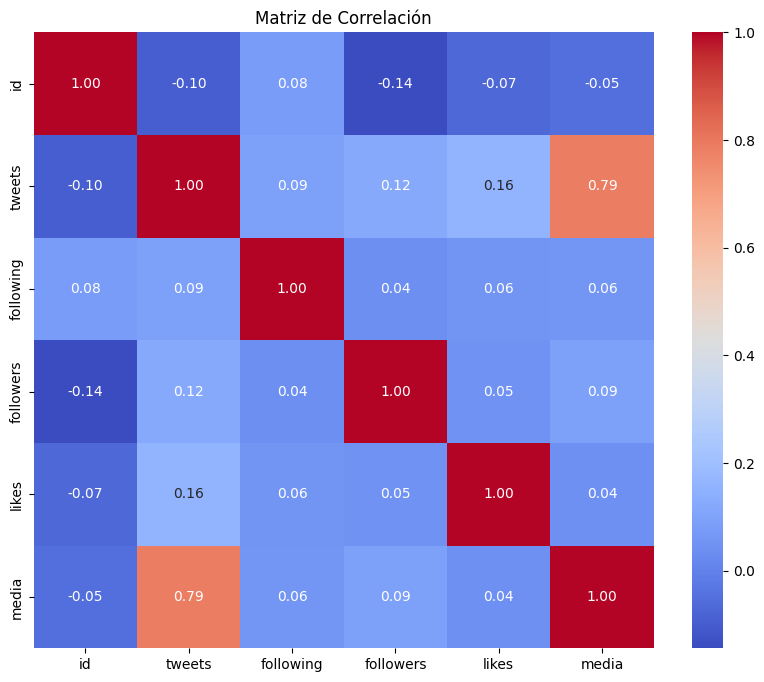

In [75]:
correlation_matrix = New_twitter_users.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Matriz de Correlación')
plt.show()

Vemos que entre las variables escogidas no hay una correlación cercana, a excepción de tweets y media por lo tanto eliminaremos la columna de media 

In [76]:
# Supongamos que tu DataFrame se llama df
New_twitter_users = New_twitter_users.drop(['media'], axis=1)

CREAR EL DATAFRAME CON LOS DATOS DE TWITTER

In [77]:
tweet_data = pd.read_csv("Datos/tweets_data.csv")
display(tweet_data)

C:\Users\jesus\AppData\Local\Temp\ipykernel_28180\2277459950.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1425590913959612419,1425590913959612419,1.628722e+12,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],409486555,409486555,MichelleObama,Michelle Obama,4,0,https://twitter.com/MichelleObama/status/14255...,[],[],0,NaN,True,0,0,232,0,NaN,NaN,NaN,NaN,1.047165e+18,We're so proud of the four organizations in ou...,1.425590e+18,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN
1,1427736867739299841,1427736867739299841,1.629234e+12,2021-08-17 22:59:29,200,NaN,Some casual suggestions to 😏SLIDE😏 into when u...,en,"['shoesdaytuesday', 'afterskewlslide']",[],21447363,21447363,katyperry,KATY PERRY,2,22,https://twitter.com/katyperry/status/142773686...,[],['https://pbs.twimg.com/media/E9BXG4YVkAAl3_A....,1,https://pbs.twimg.com/media/E9BXG4YVkAAl3_A.jpg,False,5266,368,408,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1427667300488937476,1427667300488937476,1.629217e+12,2021-08-17 18:23:03,200,NaN,RT @ValaAfshar: You are not your job.,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,18,https://twitter.com/katyperry/status/142766730...,[],[],0,NaN,True,0,0,764,0,NaN,NaN,NaN,NaN,2.597252e+08,You are not your job.,1.427648e+18,[],2021-08-17 17:05:53 CEST,NaN,NaN,NaN
3,1427667012105371652,1427667012105371652,1.629217e+12,2021-08-17 18:21:55,200,NaN,What have we become 😔😂 Toddler Cites Freedom ...,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,18,https://twitter.com/katyperry/status/142766701...,['https://www.theonion.com/toddler-cites-freed...,[],0,NaN,False,5638,476,438,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1427497703596990467,1427497703596990467,1.629177e+12,2021-08-17 07:09:08,200,NaN,The tech giants that refuse to massively addre...,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,7,https://twitter.com/katyperry/status/142749770...,[],[],0,NaN,False,8810,546,1211,https://twitter.com/VICENews/status/1427311204...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40576,1427593440469061634,1427593440469061634,1.629200e+12,2021-08-17 13:29:34,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],247217109,247217109,NAkufoAddo,Nana Akufo-Addo,2,13,https://twitter.com/NAkufoAddo/status/14275934...,[],['https://pbs.twimg.com/media/E8_UqTeX0AoP7pB....,1,https://pbs.twimg.com/media/E8_UqTeX0AoP7pB.jpg,False,961,90,192,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
40577,1427592955272089642,1427592930722820096,1.629200e+12,2021-08-17 13:27:38,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],247217109,247217109,NAkufoAddo,Nana Akufo-Addo,2,13,https://twitter.com/NAkufoAddo/status/14275929...,[],['https://pbs.twimg.com/media/E8_UOCbWYAAWdac....,1,https://pbs.twimg.com/media/E8_UOCbWYAAWdac.jpg,False,224,12,48,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
40578,1427592942441598980,1427592930722820096,1.629200e+12,2021-08-17 13:27:35,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],247217109,247217109,NAkufoAddo,Nana Akufo-Addo,2,13,https://twitter.com/NAkufoAddo/status/14275929...,[],['https://pbs.twimg.com/media/E8_UNXIWQAACaRG....,1,https://pbs.twimg.com/media/E8_UNXIWQAACaRG.jpg,False,240,12,51,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
40579,1427592930722820096,1427592930722820096,1.629200e+12,2021-08-17 13:27:32,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],247217109,247217109,NAkufoAddo,Nana Akufo-Addo,2,13,https://twitter.com/NAkufoAddo/status/14275929...,[],['https://pbs.twimg.com/media/E8_UMhMXIAIrQWT....,1,https://pbs.

INFORMACIÓN ESTADÍSTICA DE CADA COLUMNA

In [78]:
tweet_data.describe()

,id,conversation_id,created_at,timezone,user_id,user_id_str,day,hour,video,nlikes,nreplies,nretweets,search,near,geo,source,user_rt_id,retweet_id,translate,trans_src,trans_dest
count,4.058100e+04,4.058100e+04,4.058100e+04,40581.0,4.058100e+04,4.058100e+04,40581.000000,40581.000000,40581.000000,4.058100e+04,40581.000000,40581.000000,0.0,0.0,0.0,0.0,6.147000e+03,6.147000e+03,0.0,0.0,0.0
mean,1.426892e+18,1.426809e+18,1.629033e+12,200.0,5.283703e+15,5.283703e+15,3.810774,13.009881,0.225598,1.333355e+03,72.702915,277.616027,NaN,NaN,NaN,NaN,2.322191e+17,1.425921e+18,NaN,NaN,NaN
std,7.773076e+14,3.405297e+15,1.853246e+08,0.0,7.671716e+16,7.671716e+16,1.884569,7.325299,0.417981,1.802289e+04,878.990993,4636.020712,NaN,NaN,NaN,NaN,4.633333e+17,1.710436e+16,NaN,NaN,NaN
min,1.425578e+18,1.045696e+18,1.628719e+12,200.0,1.200000e+01,1.200000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,2.986000e+03,6.386550e+17,NaN,NaN,NaN
25%,1.426195e+18,1.426187e+18,1.628866e+12,200.0,5.988062e+06,5.988062e+06,2.000000,6.000000,0.000000,6.000000e+00,0.000000,4.000000,NaN,NaN,NaN,NaN,2.809772e+07,1.426023e+18,NaN,NaN,NaN
50%,1.426932e+18,1.426920e+18,1.629042e+12,200.0,1.666468e+07,1.666468e+07,4.000000,15.000000,0.000000,3.900000e+01,3.000000,15.000000,NaN,NaN,NaN,NaN,2.533967e+08,1.426674e+18,NaN,NaN,NaN
75%,1.427628e+18,1.427623e+18,1.629208e+12,200.0,7.894161e+07,7.894161e+07,5.000000,19.000000,0.000000,1.980000e+02,24.000000,71.000000,NaN,NaN,NaN,NaN,2.942386e+09,1.427384e+18,NaN,NaN,NaN
max,1.428114e+18,1.428114e+18,1.629324e+12,200.0,1.407034e+18,1.407034e+18,7.000000,23.000000,1.000000,1.920242e+06,88035.000000,541964.000000,NaN,NaN,NaN,NaN,1.427235e+18,1.428112e+18,NaN,NaN,NaN


In [79]:
ver_likes = tweet_data['nlikes']

ver_likes.describe()

count    4.058100e+04
mean     1.333355e+03
std      1.802289e+04
min      0.000000e+00
25%      6.000000e+00
50%      3.900000e+01
75%      1.980000e+02
max      1.920242e+06
Name: nlikes, dtype: float64

In [80]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40581 entries, 0 to 40580
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               40581 non-null  int64  
 1   conversation_id  40581 non-null  int64  
 2   created_at       40581 non-null  float64
 3   date             40581 non-null  object 
 4   timezone         40581 non-null  int64  
 5   place            34 non-null     object 
 6   tweet            40581 non-null  object 
 7   language         40581 non-null  object 
 8   hashtags         40581 non-null  object 
 9   cashtags         40581 non-null  object 
 10  user_id          40581 non-null  int64  
 11  user_id_str      40581 non-null  int64  
 12  username         40581 non-null  object 
 13  name             40581 non-null  object 
 14  day              40581 non-null  int64  
 15  hour             40581 non-null  int64  
 16  link             40581 non-null  object 
 17  urls        

VER SI EXISTEN NULOS

In [81]:
tweet_data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
timezone               0
place              40547
tweet                  0
language               0
hashtags               0
cashtags               0
user_id                0
user_id_str            0
username               0
name                   0
day                    0
hour                   0
link                   0
urls                   0
photos                 0
video                  0
thumbnail          31426
retweet                0
nlikes                 0
nreplies               0
nretweets              0
quote_url              0
search             40581
near               40581
geo                40581
source             40581
user_rt_id         34434
user_rt            34434
retweet_id         34434
reply_to               0
retweet_date       34434
translate          40581
trans_src          40581
trans_dest         40581
dtype: int64

In [82]:
tweet_data['place'].unique()

array([nan, "{'type': 'Point', 'coordinates': [48.8567, 2.3508]}",
       "{'type': 'Point', 'coordinates': [47.4719, 19.0503]}",
       "{'type': 'Point', 'coordinates': [25.18202966, 55.25453568]}",
       "{'type': 'Point', 'coordinates': [37.519883, 127.026502]}",
       "{'type': 'Point', 'coordinates': [47.6046, -122.3308]}",
       "{'type': 'Point', 'coordinates': [14.569, 121.133]}",
       "{'type': 'Point', 'coordinates': [39.9423998, -75.14109858]}",
       "{'type': 'Point', 'coordinates': [41.01277778, -73.86611111]}",
       "{'type': 'Point', 'coordinates': [40.71270142, -74.00589108]}",
       "{'type': 'Point', 'coordinates': [34.0564, -118.2445]}",
       "{'type': 'Point', 'coordinates': [40.54624139, 14.24909308]}",
       "{'type': 'Point', 'coordinates': [51.5141, -0.1094]}",
       "{'type': 'Point', 'coordinates': [-34.6089, -58.4397]}",
       "{'type': 'Point', 'coordinates': [-34.58557765, -58.44128861]}",
       "{'type': 'Point', 'coordinates': [-34.60181,

In [83]:
#Vemos que el numero de replies(número de respuesta al tweet) normalmente es más bajo que los retweets
#Tambien vemos que el número de tweets no depende tampoco si tiene imagen o no
columnas_check = tweet_data[['photos','nretweets']]
columnas_check.head(20)

,photos,nretweets
0,[],232
1,['https://pbs.twimg.com/media/E9BXG4YVkAAl3_A....,408
2,[],764
3,[],438
4,[],1211
5,[],430
6,[],5360
7,[],35
8,['https://pbs.twimg.com/media/E9CWWR7X0AIAl5v....,965
9,[],176


In [84]:
tweet_data['photos'] = tweet_data['photos'].apply(lambda x: 0 if x == '[]' else 1)


In [85]:
tweet_data['photos']

0        0
1        1
2        0
3        0
4        0
        ..
40576    1
40577    1
40578    1
40579    1
40580    1
Name: photos, Length: 40581, dtype: int64

In [86]:
tweet_data['photos'].unique()

array([0, 1], dtype=int64)

In [87]:
correlation = tweet_data['photos'].corr(tweet_data['nretweets'])
print(f"Coeficiente de correlación: {correlation}")

Coeficiente de correlación: 0.02932804262925881


Vemos que hay muy poco de realción de la columna photos y el target "nretweets", por ello podríamos presindir de esta columna

In [88]:
tweet_data['video']

0        0
1        1
2        0
3        0
4        0
        ..
40576    1
40577    1
40578    1
40579    1
40580    1
Name: video, Length: 40581, dtype: int64

In [89]:
tweet_data['video'].unique()

array([0, 1], dtype=int64)

In [90]:
correlation = tweet_data['video'].corr(tweet_data['nretweets'])
print(f"Coeficiente de correlación: {correlation}")

Coeficiente de correlación: 0.031152646817957645


In [91]:
mediana= tweet_data.groupby('video')['nretweets'].median()
mediana

video
0    13.0
1    29.0
Name: nretweets, dtype: float64

In [92]:
columnas_check = tweet_data[['retweet','nretweets']]
columnas_check.head(20)

,retweet,nretweets
0,True,232
1,False,408
2,True,764
3,False,438
4,False,1211
5,True,430
6,False,5360
7,False,35
8,False,965
9,True,176


Tiene casi la misma relación que la columna photos por lo que no nos interesa

In [93]:
hashtags1_count = tweet_data['hashtags'].value_counts()

# mostrar la frecuencia de cada valor único
print(hashtags1_count)

hashtags
[]                                                                       35284
['argenzuela']                                                              80
['admin', 'autopost']                                                       57
['cookingwithparis']                                                        55
['mlda']                                                                    52
                                                                         ...  
['morena', 'amlo', 'mlda', 'pan', 'revocacióndemandato', 'heraldotv']        1
['revocacióndemandato', 'mlda', 'morena', 'heraldotv']                       1
['amlo', 'mlda', 'revocacióndemandato', 'heraldotv']                         1
['sagalive']                                                                 1
['مصطفى_الآغا', 'مي_الخطيب']                                                 1
Name: count, Length: 2561, dtype: int64


In [94]:
tweet_data['retweet'] = tweet_data['retweet'].astype(int)

In [95]:
correlation = tweet_data['retweet'].corr(tweet_data['nretweets'])
print(f"Coeficiente de correlación: {correlation}")

Coeficiente de correlación: 0.02380863805795873


Vemos que la mayoría de tweets no tienen hastags, por lo que precindimos también de está columna

In [96]:
pd.set_option('display.max_columns', None)


In [97]:
tweet_data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

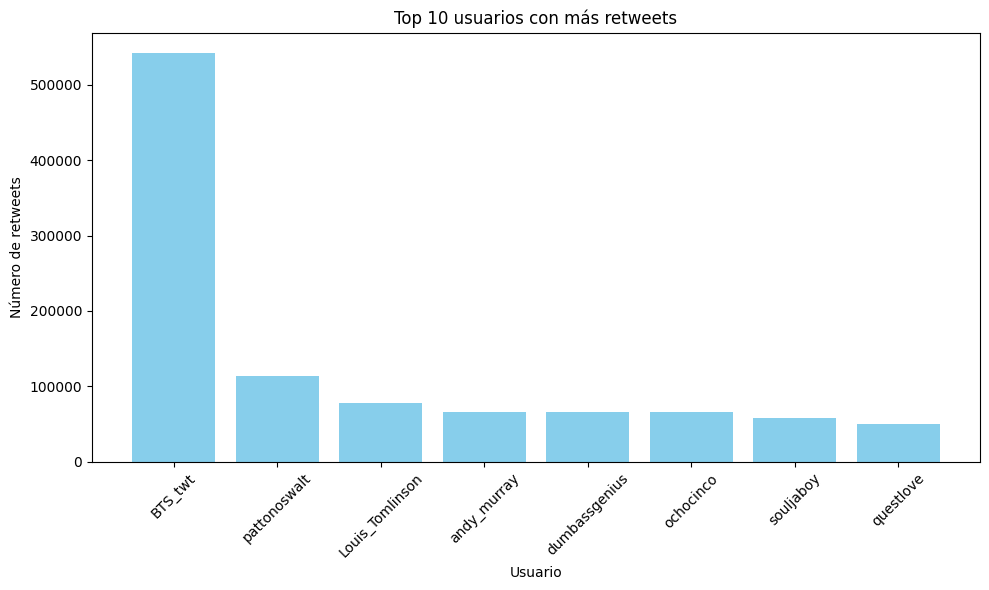

In [98]:
import matplotlib.pyplot as plt

# Ordena el DataFrame por la columna 'nretweets' de forma descendente
df_sorted = tweet_data.sort_values(by='nretweets', ascending=False)

# Selecciona las 10 primeras filas después de ordenar
top_10 = df_sorted.head(10)

# Grafica las 10 personas con más retweets
plt.figure(figsize=(10,6))
plt.bar(top_10['username'], top_10['nretweets'], color='skyblue')
plt.xlabel('Usuario')
plt.ylabel('Número de retweets')
plt.title('Top 10 usuarios con más retweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Vemos que los ususarios con la mayor cantidad de  retweets son artistas o famosos de entretenimiento, por lo cual dependendiendo del usuario que publique el tweet que vamos a seleccionar, es posible que no tenga que ver mucho con el core del negocio.

Por lo tanto, sera un poco dificil adaptar los blogs a los temas que hablen estos famosos.

In [99]:
tweet_data['language'].unique()

array(['en', 'und', 'ht', 'es', 'da', 'fr', 'de', 'pl', 'no', 'nl', 'ko',
       'hi', 'iw', 'pt', 'sv', 'mr', 'et', 'in', 'cy', 'lt', 'is', 'it',
       'ca', 'ro', 'tl', 'th', 'eu', 'ja', 'ar', 'tr', 'ta', 'hu', 'fi',
       'lv', 'cs', 'vi', 'zh', 'fa', 'ru', 'ur'], dtype=object)

In [100]:
language_counts = tweet_data['language'].value_counts()
print(language_counts)

language
en     30430
es      3362
ar      2392
und     1535
pt      1392
tr       308
in       248
hi       177
fr       156
tl       146
ko        65
ja        59
ca        51
de        43
ur        39
ru        29
ht        21
it        19
iw        18
ro         9
da         9
nl         9
et         7
pl         7
lt         7
sv         7
no         5
fi         5
cs         5
eu         4
cy         4
lv         2
mr         2
ta         2
is         2
hu         1
vi         1
zh         1
fa         1
th         1
Name: count, dtype: int64


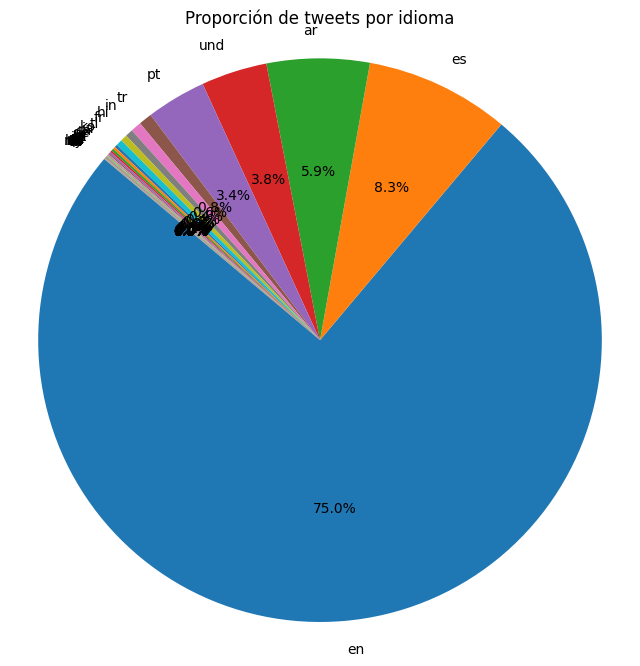

In [101]:
import matplotlib.pyplot as plt

# Calcular la cantidad de tweets por cada idioma
tweets_por_idioma = tweet_data['language'].value_counts()

# Obtener los datos para el gráfico circular
idiomas = tweets_por_idioma.index
cantidad_tweets = tweets_por_idioma.values

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(cantidad_tweets, labels=idiomas, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de tweets por idioma')
plt.axis('equal') 
plt.show()


Un gran porcentaje de los tweets están escritos en ingles, por lo tanto lo más logico es que el grupo de tweets virales deben estar en este idioma, ya que es el más se habla en esta plataforma


In [102]:
# Suponiendo que 'date' es la columna que contiene la fecha en tu DataFrame
# Asegúrate de convertir la columna 'date' a formato datetime si no está en ese formato todavía
tweet_data['date'] = pd.to_datetime(tweet_data['date'])

# Obtener la fecha mínima y máxima
fecha_minima = tweet_data['date'].min()
fecha_maxima = tweet_data['date'].max()

print("Fecha mínima de los datos:", fecha_minima)
print("Fecha máxima de los datos:", fecha_maxima)


Fecha mínima de los datos: 2021-08-12 00:00:00
Fecha máxima de los datos: 2021-08-19 00:00:00


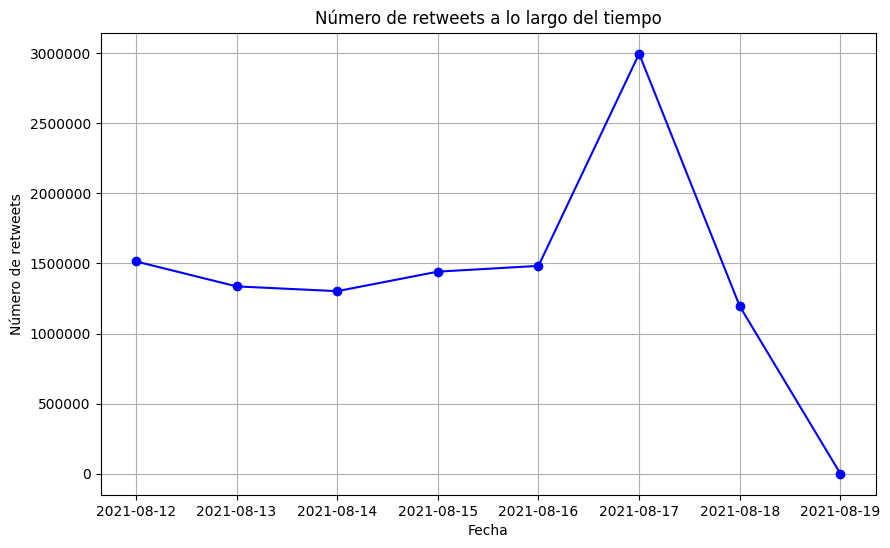

In [103]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Suponiendo que 'date' es la columna que contiene la fecha y 'nretweets' es la columna que contiene el número de retweets
# Asegúrate de convertir la columna 'date' a formato datetime si no está en ese formato todavía
tweet_data['date'] = pd.to_datetime(tweet_data['date'])

# Agrupar por fecha y sumar el número de retweets para cada día
retweets_por_dia = tweet_data.groupby(tweet_data['date'].dt.date)['nretweets'].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
retweets_por_dia.plot(color='blue', marker='o', linestyle='-')
plt.title('Número de retweets a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de retweets')

# Formatear los ticks del eje y como enteros
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.grid(True)
plt.show()


Vemos que 17 hubo un pico de retweets, investigando un poco encontramos que es el Día Internacional de Conmemoración y Homenaje a las Víctimas del Terrorismo.

id                     0-- NO ME INTERESA  Es un valor que se genera a futuro

conversation_id        0-- NO ME INTERESA  Es un valor que se genera a futuro

created_at             0-- NO ME INTERESA  Es un valor que se genera a futuro

date                   0-- NO ME INTERESA  Ya que la hora y fecha especifica no nos aportaría una ayuda, ademas ya tenemos los valores de día   -                       y             hora

timezone               0-- NO ME INTERESA  Ya que un tweet puede ser viral en cualquierzona geográfica

place              40547-- NO ME INTERESA  La mayoria de los valores son null, ademas son coordenadas muy especificas.

tweet                  0-- NO ME INTERESA  

language               0-- NO ME INTERESA  Ya que la mayoria de los tweets están en ingles.

hashtags               0--NO ME INTERESA Ya que la mayoria están vacios

cashtags               0-- NO ME INTERESA  Las menciones de símbolos financieros en los tweets

user_id                0

user_id_str            0-- NO ME INTERESA   Ya que tenemos el user_id

username               0-- NO ME INTERESA   Ya que tenemos el user_id

name                   0-- NO ME INTERESA   Ya que tenemos el user_id

day                    0

hour                   0

link                   0-- NO ME INTERESA La presencia de enlances no puede tener una realción cercana a la viralidad

urls                   0-- NO ME INTERESA La presencia de enlances no puede tener una realción cercana a la viralidad

photos                 0-- No ME INTERESA Ya que vemos que no tiene mucha relevancia respecto al target

video                  0-- No ME INTERESA Ya que vemos que no tiene mucha relevancia respecto al target

thumbnail          31426-- NO ME INTERESA Hay bastantes valores null y las miniaturas no tienen mayor relevancia

retweet                0-- No ME INTERESA Ya que vemos que no tiene mucha relevancia respecto al target

nlikes                 0-- NO ME INTERESA   Es un valor que se genera a futuro  y mi target va a ser "nretweets"

nreplies               0-- NO ME INTERESA   Es un valor que se genera a futuro  y mi target va a ser "nretweets"

nretweets              0

quote_url              0-- NO ME INTERESA   Ya que tenemos la columna de retweet que nos índica si es un tweet referente a otro.

search             40581-- NO ME INTERESA   Todos los valores son null

near               40581-- NO ME INTERESA   Todos los valores son null

geo                40581-- NO ME INTERESA   Todos los valores son null

source             40581-- NO ME INTERESA   Todos los valores son null

user_rt_id         34434-- NO ME INTERESA   Es un valor que se genera a futuro

user_rt            34434-- NO ME INTERESA   Es un valor que se genera a futuro

retweet_id         34434-- NO ME INTERESA   Es un valor que se genera a futuro

reply_to               0-- NO ME INTERESA   Es un valor que se genera a futuro

retweet_date       34434-- NO ME INTERESA   Es un valor que se genera a futuro

translate          40581-- NO ME INTERESA   Todos los valores son null

trans_src          40581-- NO ME INTERESA   Todos los valores son null

trans_dest         40581-- NO ME INTERESA   Todos los valores son null


Quedamos con las siguientes columnas:

user_id -> La persona que escriba el tweet puede ser muy relevante basandonos en sus estadísticas.
day -> Es posible que cierto día haya más actividad.
hour  -> Es posible que ha cierta hora haya más actividad de lo normal
nretweets  -> Es nuestro target

In [104]:
columnas_a_eliminar = ['id', 'tweet', 'language', 'nreplies','hashtags', 'nlikes' ,'conversation_id','created_at','date','timezone','place','username','name','link','urls','thumbnail','retweet_date','translate', 'trans_src', 'trans_dest', 'search','near', 'geo', 'source','user_rt_id', 'user_rt', 'retweet_id', 'quote_url', 'user_id_str', 'cashtags', 'reply_to', 'video'
                       , 'photos'
                       #, 'retweet'
                       ]

# Eliminar las columnas de la lista
New_tweet_data = tweet_data.drop(columns=columnas_a_eliminar)


In [105]:
New_tweet_data.isnull().sum()

user_id      0
day          0
hour         0
retweet      0
nretweets    0
dtype: int64

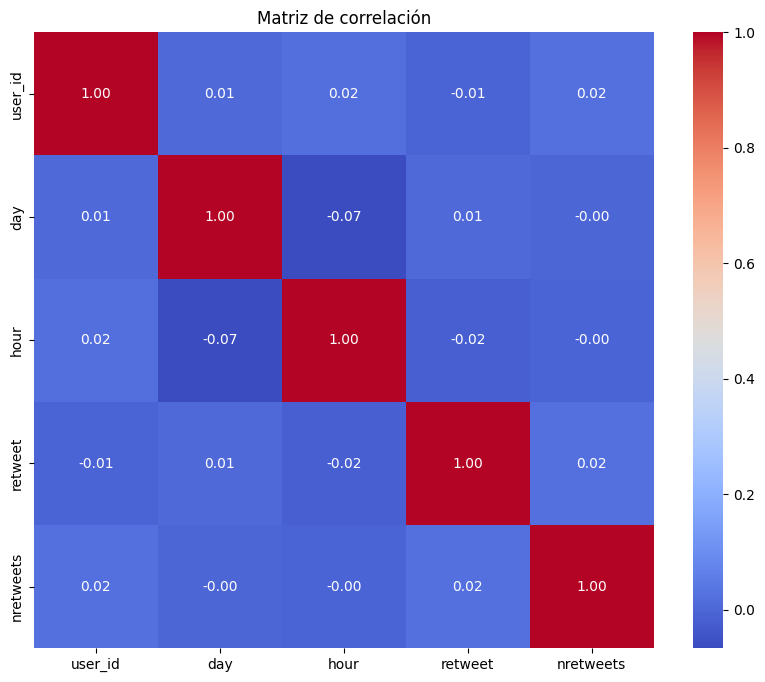

In [106]:
correlation_matrix = New_tweet_data.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Mostrar el mapa de calor
plt.title('Matriz de correlación')
plt.show()

Pasamos el id a númerico

In [107]:

#New_tweet_data['user_id'] = pd.to_numeric(New_tweet_data['user_id'], errors='coerce')

New_twitter_users['id'] = pd.to_numeric(New_twitter_users['id'], errors='coerce')



In [108]:


# Realizar la unión de los DataFrames
Datos_unidos = pd.merge(New_twitter_users, New_tweet_data, left_on='id', right_on='user_id')

# Mostrar el DataFrame combinado
Datos_unidos


,id,tweets,following,followers,likes,user_id,day,hour,retweet,nretweets
0,21447363,11420.0,235.0,108819032.0,7995,21447363,2,22,0,408
1,21447363,11420.0,235.0,108819032.0,7995,21447363,2,18,1,764
2,21447363,11420.0,235.0,108819032.0,7995,21447363,2,18,0,438
3,21447363,11420.0,235.0,108819032.0,7995,21447363,2,7,0,1211
4,21447363,11420.0,235.0,108819032.0,7995,21447363,6,19,1,430
...,...,...,...,...,...,...,...,...,...,...
16123,17481977,19867.0,680.0,1849529.0,152,17481977,4,16,0,0
16124,17481977,19867.0,680.0,1849529.0,152,17481977,4,15,0,0
16125,17481977,19867.0,680.0,1849529.0,152,17481977,4,15,0,0
16126,17481977,19867.0,680.0,1849529.0,152,17481977,4,15,0,0


In [109]:
Datos_unidos.describe()

,id,tweets,following,followers,user_id,day,hour,retweet,nretweets
count,1.612800e+04,16128.000000,1.612800e+04,1.612800e+04,1.612800e+04,16128.000000,16128.000000,16128.000000,16128.000000
mean,9.251746e+15,145612.728547,5.929038e+03,1.394163e+07,9.251746e+15,3.863467,13.284226,0.167039,390.720672
std,1.063510e+17,140674.247876,4.839138e+04,1.651527e+07,1.063510e+17,1.886356,7.249751,0.373022,7100.267401
min,1.200000e+01,116.000000,0.000000e+00,7.037000e+03,1.200000e+01,1.000000,0.000000,0.000000,0.000000
25%,5.971922e+06,29588.000000,3.110000e+02,3.585269e+06,5.971922e+06,2.000000,7.000000,0.000000,4.000000
50%,1.699802e+07,84331.000000,8.410000e+02,7.380633e+06,1.699802e+07,4.000000,15.000000,0.000000,17.000000
75%,1.454995e+08,270740.000000,2.459000e+03,1.693040e+07,1.454995e+08,5.000000,19.000000,0.000000,99.000000
max,1.349155e+18,443030.000000,1.419893e+06,1.139276e+08,1.349155e+18,7.000000,23.000000,1.000000,541964.000000


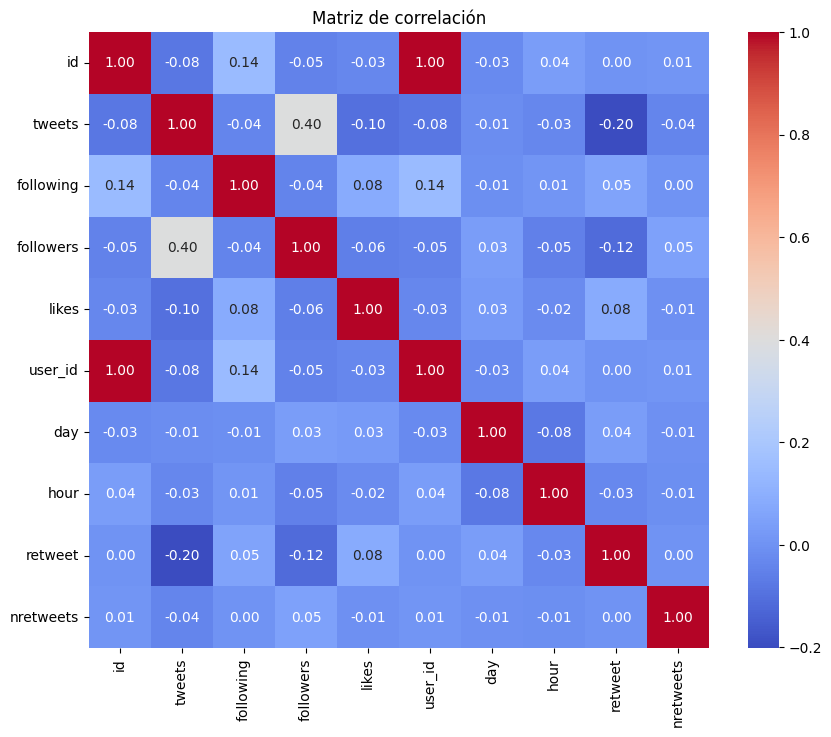

In [110]:
correlation_matrix2 = Datos_unidos.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f')

# Mostrar el mapa de calor
plt.title('Matriz de correlación')
plt.show()

DIVIDIMOS LOS DATOS DE VALIDATION Y TRAIN:

Nuestro target según los datos que tenemos va a ser 50 retweets, ya que vemso que la mayoría de los tweets tienen retweets por debajo de 90.

A continuación, voy a probar distintos modelos de de clasificación para elegir entre ellos.

Para ello, voy a sacar diferentes metricas:

Rendimiento en el conjunto de validación:
Exactitud: 0.6853688778673279
Precisión: 0.5190069821567106
Recall: 0.6287593984962406
Especificidad: 0.7132284921369103
Valor predictivo negativo: 0.7960764068146619
Valor predictivo positivo: 0.5190069821567106
F1-score: 0.5686357841053973


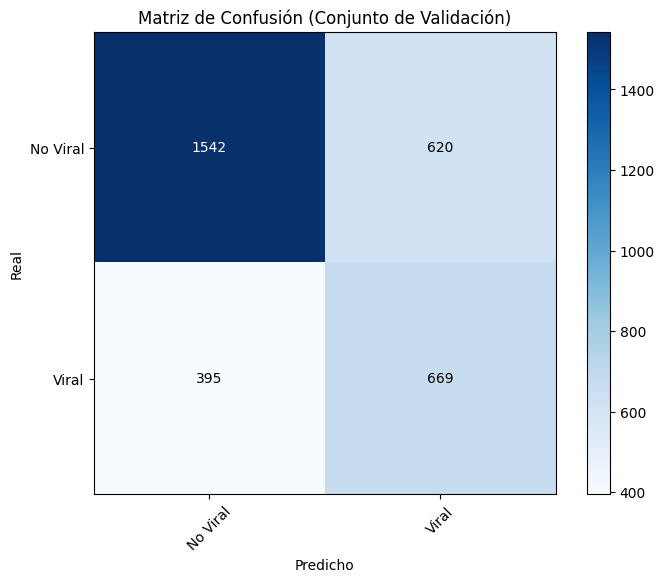

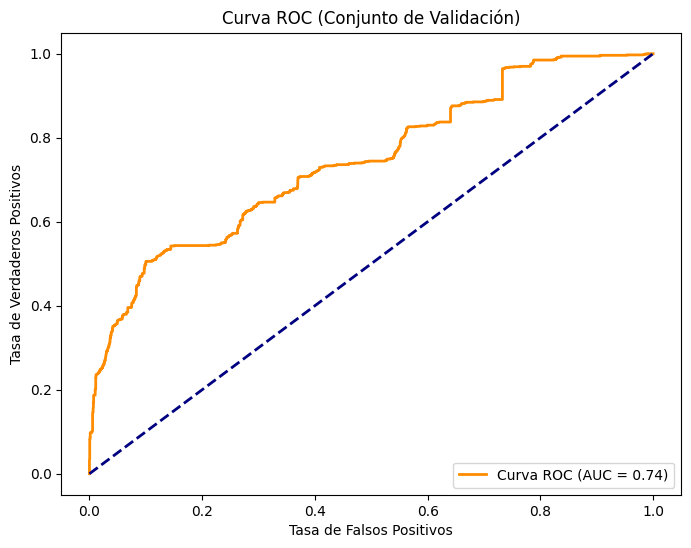

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_and_evaluate_model(data, features, target):
    # Definir las características (features) y la variable objetivo
    X = data[features]
    y = (data[target] > 50).astype(int)

    # Dividir los datos en conjuntos de entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el modelo de regresión logística
    modelo = LogisticRegression()

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    predicciones_val = modelo.predict(X_val)

    # Evaluar el rendimiento del modelo en el conjunto de validación
    accuracy_val = accuracy_score(y_val, predicciones_val)
    conf_matrix_val = confusion_matrix(y_val, predicciones_val)
    classification_rep_val = classification_report(y_val, predicciones_val)

    # Calcular las métricas adicionales
    precision_val = precision_score(y_val, predicciones_val)
    recall_val = recall_score(y_val, predicciones_val)
    f1_score_val = f1_score(y_val, predicciones_val)

    # Especificidad y valor predictivo negativo requieren la matriz de confusión
    tn, fp, fn, tp = conf_matrix_val.ravel()
    specificity_val = tn / (tn + fp)
    vpn_val = tn / (tn + fn)
    vpp_val = tp / (tp + fp)

    print("Rendimiento en el conjunto de validación:")
    print(f"Exactitud: {accuracy_val}")
    print(f"Precisión: {precision_val}")
    print(f"Recall: {recall_val}")
    print(f"Especificidad: {specificity_val}")
    print(f"Valor predictivo negativo: {vpn_val}")
    print(f"Valor predictivo positivo: {vpp_val}")
    print(f"F1-score: {f1_score_val}")

    # Graficar la matriz de confusión del conjunto de validación
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix_val, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión (Conjunto de Validación)')
    plt.colorbar()

    classes = ['No Viral', 'Viral']
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicho')
    plt.ylabel('Real')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(conf_matrix_val[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if conf_matrix_val[i, j] > conf_matrix_val.max() / 2.0 else "black")

    plt.show()

    # Graficar la curva ROC del conjunto de validación
    y_prob_val = modelo.predict_proba(X_val)[:, 1]
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_prob_val)
    roc_auc_val = auc(fpr_val, tpr_val)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC (Conjunto de Validación)')
    plt.legend(loc='lower right')
    plt.show()

# Ejemplo de uso
# Supongamos que Datos_unidos es tu dataframe y deseas usar las columnas 'tweets', 'following', 'followers', 'likes', 'day', 'hour'
# como características y 'nretweets' como la variable objetivo
train_and_evaluate_model(Datos_unidos, ['tweets', 'following', 'followers', 'likes', 'day', 'hour'], 'nretweets')


Modificamos como presentamos las métricas y seguimos usando LogisticRegression

Rendimiento en el conjunto de validación:
Accuracy: 0.6853688778673279
Confusion Matrix:
[[1542  620]
 [ 395  669]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2162
           1       0.52      0.63      0.57      1064

    accuracy                           0.69      3226
   macro avg       0.66      0.67      0.66      3226
weighted avg       0.70      0.69      0.69      3226



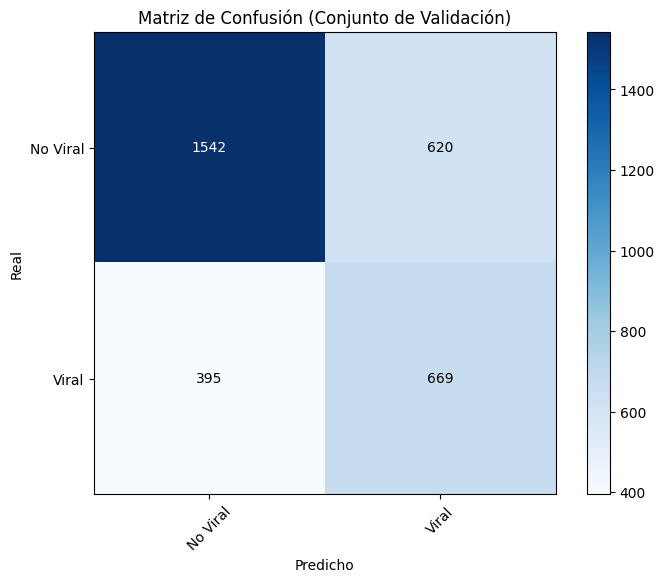

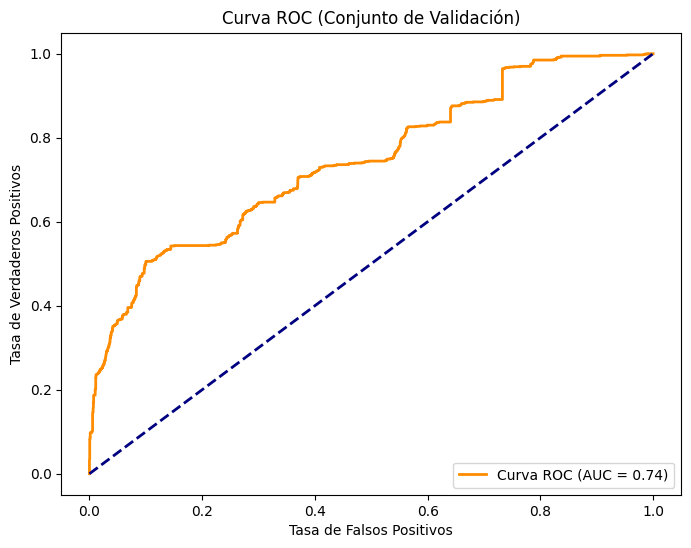

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_and_evaluate_model(data, features, target):
    # Definir las características (features) y la variable objetivo
    X = data[features]
    y = (data[target] > 50).astype(int)

    # Dividir los datos en conjuntos de entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el modelo de regresión logística
    modelo = LogisticRegression()

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    predicciones_val = modelo.predict(X_val)

    # Evaluar el rendimiento del modelo en el conjunto de validación
    accuracy_val = accuracy_score(y_val, predicciones_val)
    conf_matrix_val = confusion_matrix(y_val, predicciones_val)
    classification_rep_val = classification_report(y_val, predicciones_val)

    print("Rendimiento en el conjunto de validación:")
    print(f"Accuracy: {accuracy_val}")
    print(f"Confusion Matrix:\n{conf_matrix_val}")
    print(f"Classification Report:\n{classification_rep_val}")

    # Graficar la matriz de confusión del conjunto de validación
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix_val, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión (Conjunto de Validación)')
    plt.colorbar()

    classes = ['No Viral', 'Viral']
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicho')
    plt.ylabel('Real')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(conf_matrix_val[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if conf_matrix_val[i, j] > conf_matrix_val.max() / 2.0 else "black")

    plt.show()

    # Graficar la curva ROC del conjunto de validación
    y_prob_val = modelo.predict_proba(X_val)[:, 1]
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_prob_val)
    roc_auc_val = auc(fpr_val, tpr_val)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC (Conjunto de Validación)')
    plt.legend(loc='lower right')
    plt.show()

# Ejemplo de uso
# Supongamos que Datos_unidos es tu dataframe y deseas usar las columnas 'tweets', 'following', 'followers', 'likes', 'day', 'hour'
# como características y 'nretweets' como la variable objetivo
train_and_evaluate_model(Datos_unidos, ['tweets', 'following', 'followers', 'likes', 'day', 'hour'], 'nretweets')


Probamos ahora con un modelo DecisionTreeClassifier

Rendimiento del modelo de árbol de decisiones en el conjunto de validación:
Accuracy: 0.8437693738375698
Confusion Matrix:
[[1959  203]
 [ 301  763]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2162
           1       0.79      0.72      0.75      1064

    accuracy                           0.84      3226
   macro avg       0.83      0.81      0.82      3226
weighted avg       0.84      0.84      0.84      3226



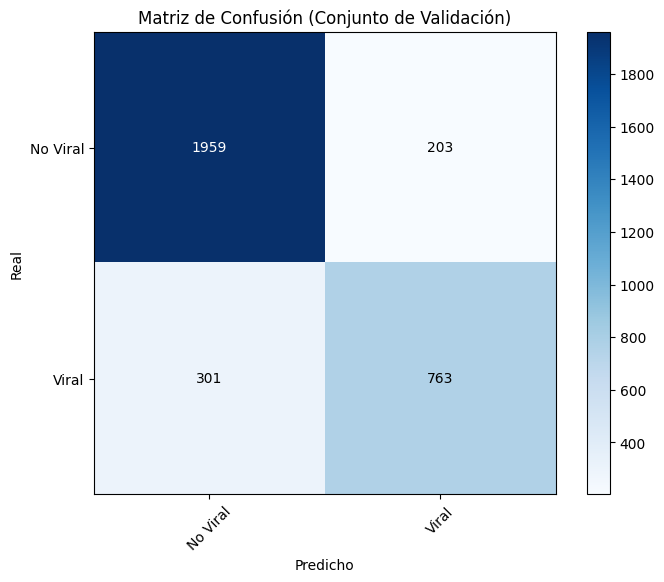

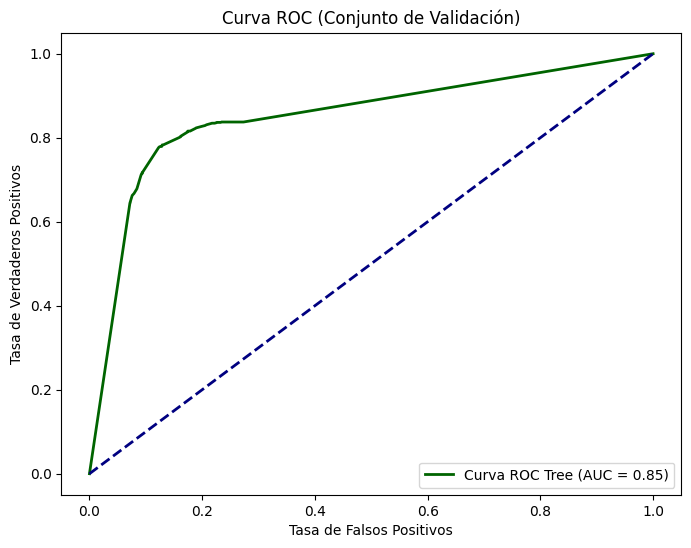

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_decision_tree_model(X_train, y_train, X_val, y_val):
    # Inicializar el modelo de árbol de decisiones
    modelo_tree = DecisionTreeClassifier()

    # Entrenar el modelo de árbol de decisiones
    modelo_tree.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    predicciones_val = modelo_tree.predict(X_val)

    # Evaluar el rendimiento del modelo en el conjunto de validación
    accuracy_val = accuracy_score(y_val, predicciones_val)
    conf_matrix_val = confusion_matrix(y_val, predicciones_val)
    classification_rep_val = classification_report(y_val, predicciones_val)

    print("Rendimiento del modelo de árbol de decisiones en el conjunto de validación:")
    print(f"Accuracy: {accuracy_val}")
    print(f"Confusion Matrix:\n{conf_matrix_val}")
    print(f"Classification Report:\n{classification_rep_val}")

    # Graficar la matriz de confusión del modelo de árbol de decisiones en el conjunto de validación
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix_val, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión (Conjunto de Validación)')
    plt.colorbar()

    classes = ['No Viral', 'Viral']
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicho')
    plt.ylabel('Real')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(conf_matrix_val[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if conf_matrix_val[i, j] > conf_matrix_val.max() / 2.0 else "black")

    plt.show()

    # Graficar la curva ROC del modelo de árbol de decisiones en el conjunto de validación
    y_prob_val = modelo_tree.predict_proba(X_val)[:, 1]
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_prob_val)
    roc_auc_val = auc(fpr_val, tpr_val)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_val, tpr_val, color='darkgreen', lw=2, label=f'Curva ROC Tree (AUC = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC (Conjunto de Validación)')
    plt.legend(loc='lower right')
    plt.show()

# Ejemplo de uso
# Supongamos que Datos_unidos es tu dataframe y deseas usar las columnas 'tweets', 'following', 'followers', 'likes', 'day', 'hour'
# como características y 'nretweets' como la variable objetivo
X = Datos_unidos[['tweets', 'following', 'followers', 'likes', 'day', 'hour']]
y = (Datos_unidos['nretweets'] > 50).astype(int)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_decision_tree_model(X_train, y_train, X_val, y_val)


Ahora probamos con RandomForestClassifier

Rendimiento del modelo de Bosques Aleatorios en el conjunto de validación:
Accuracy: 0.8598884066955983
Confusion Matrix:
[[1961  201]
 [ 251  813]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2162
           1       0.80      0.76      0.78      1064

    accuracy                           0.86      3226
   macro avg       0.84      0.84      0.84      3226
weighted avg       0.86      0.86      0.86      3226



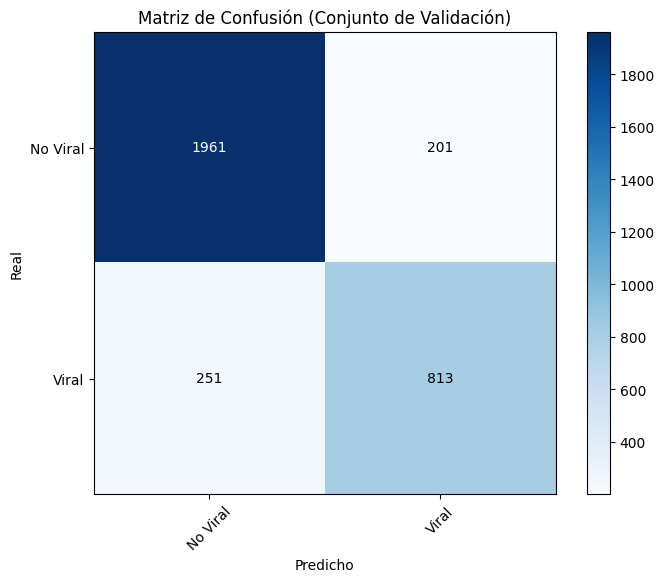

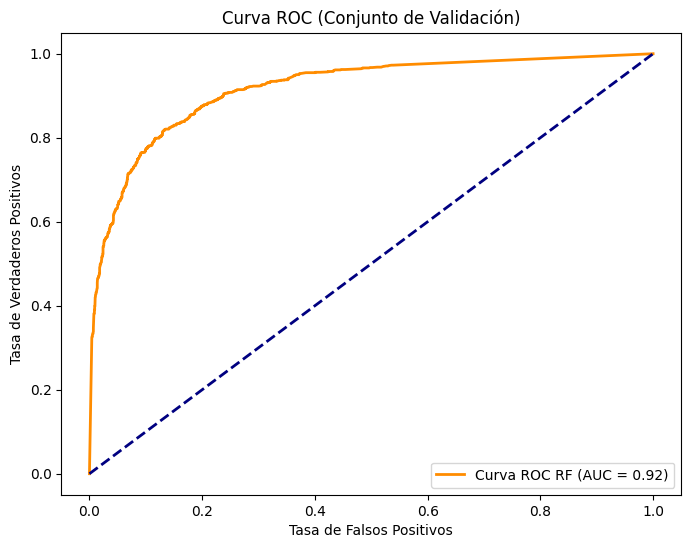

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_random_forest_model(X_train, y_train, X_val, y_val):
    # Inicializar el modelo de Bosques Aleatorios
    modelo_rf = RandomForestClassifier()

    # Entrenar el modelo de Bosques Aleatorios
    modelo_rf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    predicciones_val = modelo_rf.predict(X_val)

    # Evaluar el rendimiento del modelo en el conjunto de validación
    accuracy_val = accuracy_score(y_val, predicciones_val)
    conf_matrix_val = confusion_matrix(y_val, predicciones_val)
    classification_rep_val = classification_report(y_val, predicciones_val)

    print("Rendimiento del modelo de Bosques Aleatorios en el conjunto de validación:")
    print(f"Accuracy: {accuracy_val}")
    print(f"Confusion Matrix:\n{conf_matrix_val}")
    print(f"Classification Report:\n{classification_rep_val}")

    # Graficar la matriz de confusión del modelo de Bosques Aleatorios en el conjunto de validación
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix_val, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión (Conjunto de Validación)')
    plt.colorbar()

    classes = ['No Viral', 'Viral']
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicho')
    plt.ylabel('Real')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(conf_matrix_val[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if conf_matrix_val[i, j] > conf_matrix_val.max() / 2.0 else "black")

    plt.show()

    # Graficar la curva ROC del modelo de Bosques Aleatorios en el conjunto de validación
    y_prob_val = modelo_rf.predict_proba(X_val)[:, 1]
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_prob_val)
    roc_auc_val = auc(fpr_val, tpr_val)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Curva ROC RF (AUC = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC (Conjunto de Validación)')
    plt.legend(loc='lower right')
    plt.show()

# Ejemplo de uso
# Supongamos que Datos_unidos es tu dataframe y deseas usar las columnas 'tweets', 'following', 'followers', 'likes', 'day', 'hour'
# como características y 'nretweets' como la variable objetivo
X = Datos_unidos[['tweets', 'following', 'followers', 'likes', 'day', 'hour']]
y = (Datos_unidos['nretweets'] > 50).astype(int)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_random_forest_model(X_train, y_train, X_val, y_val)


In [115]:
columnas_a_eliminar = ['id', 'tweet' , 'nreplies','hashtags', 'nlikes' ,'conversation_id','created_at','date','timezone','place','username','name','link','urls','thumbnail','retweet_date','translate', 'trans_src', 'trans_dest', 'search','near', 'geo', 'source','user_rt_id', 'user_rt', 'retweet_id', 'quote_url', 'user_id_str', 'cashtags', 'reply_to'
                       ,'language'
                       
                       #, 'video'
                       #, 'photos'
                       , 'retweet'
                       ]

# Eliminar las columnas de la lista
New_tweet_data = tweet_data.drop(columns=columnas_a_eliminar)

In [116]:
New_twitter_users['id'] = pd.to_numeric(New_twitter_users['id'], errors='coerce')



In [117]:
# Realizar la unión de los DataFrames
Datos_unidos = pd.merge(New_twitter_users, New_tweet_data, left_on='id', right_on='user_id')

# Mostrar el DataFrame combinado
Datos_unidos



,id,tweets,following,followers,likes,user_id,day,hour,photos,video,nretweets
0,21447363,11420.0,235.0,108819032.0,7995,21447363,2,22,1,1,408
1,21447363,11420.0,235.0,108819032.0,7995,21447363,2,18,0,0,764
2,21447363,11420.0,235.0,108819032.0,7995,21447363,2,18,0,0,438
3,21447363,11420.0,235.0,108819032.0,7995,21447363,2,7,0,0,1211
4,21447363,11420.0,235.0,108819032.0,7995,21447363,6,19,0,0,430
...,...,...,...,...,...,...,...,...,...,...,...
16123,17481977,19867.0,680.0,1849529.0,152,17481977,4,16,0,0,0
16124,17481977,19867.0,680.0,1849529.0,152,17481977,4,15,0,0,0
16125,17481977,19867.0,680.0,1849529.0,152,17481977,4,15,0,0,0
16126,17481977,19867.0,680.0,1849529.0,152,17481977,4,15,0,0,0


In [118]:
X = Datos_unidos[['tweets', 'following', 'followers', 'likes', 'day', 'hour', 'photos', 'video']]
y = (Datos_unidos['nretweets'] > 50).astype(int)

Rendimiento del modelo de Bosques Aleatorios en el conjunto de validación:
Accuracy: 0.8667079975201488
Confusion Matrix:
[[1972  190]
 [ 240  824]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2162
           1       0.81      0.77      0.79      1064

    accuracy                           0.87      3226
   macro avg       0.85      0.84      0.85      3226
weighted avg       0.87      0.87      0.87      3226



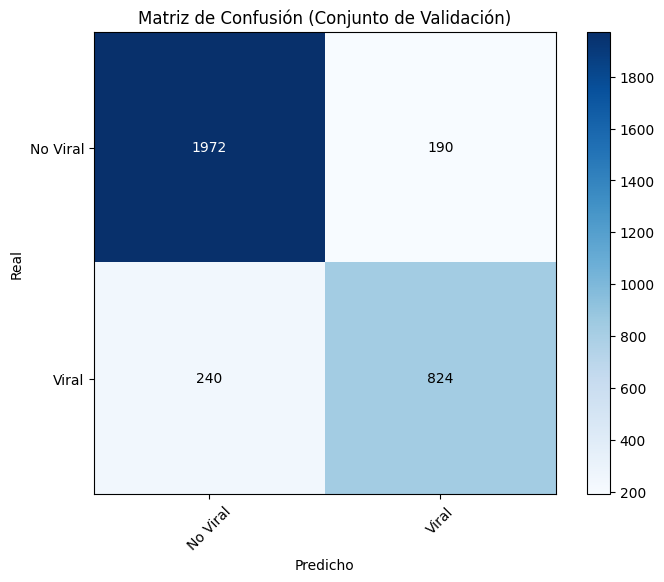

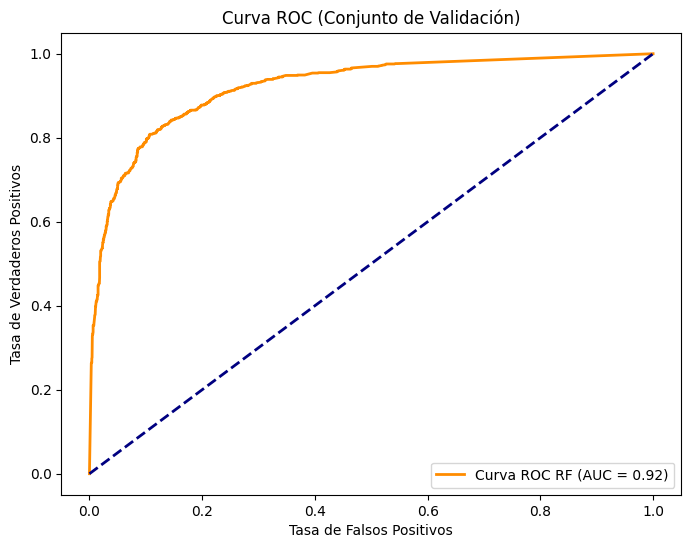

In [119]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_random_forest_model(X_train, y_train, X_val, y_val)


Accurary(Exactitud): Tenemos un valor de 0.8725, siginifica que el modelo clasifica correctamente el 87,25% de los todos tweets.

Confunsion Matrix(Matriz de confusión): Se represanta las predicciones correctas e incorrectas

Verdaderos positivos (TP): 845 tweets que fueron clasificados correctamente como virales.

Verdaderos negativos (TN): 1954 tweets que fueron clasificados correctamente como no virales.

Falsos positivos (FP): 195 tweets que fueron incorrectamente clasificados como virales.

Falsos negativos (FN): 214 tweets que fueron incorrectamente clasificados como no virales.


Precision (Precisión): La precisión es la proporción de tweets clasificados como virales que realmente son virales. Con un vlor de 0.81 de los tweets clasificiados como virales lo son en realidad

Recall (Recuperación o Sensibilidad): La recuperación es la proporción de tweets virales que fueron correctamente identificados por el modelo. Con un valor de 0.80, el modelo captura alrededor del 80% de todos los tweets virales en el conjunto de prueba.

F1-score: El F1-score es la media armónica entre precisión y recuperación. Es una medida útil para encontrar un equilibrio entre ambas métricas. Tenemos  un valor de 0.81, lo que indica un buen balance entre precisión y recuperación.

AUC (Area Under the Curve): El área bajo la curva ROC es una medida de la capacidad de discriminación del modelo. Con un valor de 0.92, el modelo tiene una muy buena capacidad para distinguir entre tweets virales y no virales.



Informe Ejecutivo: Evaluación del Modelo de Clasificación de Tweets para Identificar Contenido Viral



Resumen:
Nuestro modelo de clasificación de tweets ha demostrado ser una herramienta valiosa para identificar contenido potencialmente viral en la plataforma. Hemos evaluado el rendimiento del modelo utilizando métricas clave y hemos encontrado resultados prometedores que respaldan su eficacia en la predicción de la viralidad de los tweets.



Rendimiento del Modelo:

Exactitud (Accuracy): El modelo ha alcanzado una tasa de exactitud del 87.25%, lo que indica que en la mayoría de los casos, clasifica correctamente los tweets como virales o no virales.

Precision y Recall: La precisión del modelo es del 81%, lo que significa que en el 81% de los casos en que clasifica un tweet como viral, realmente lo es. 

Además, el modelo tiene una tasa de recall del 80%, lo que indica que captura el 80% de todos los tweets virales presentes en el conjunto de prueba.

AUC (Area Under the Curve): Con un valor de 0.92, el área bajo la curva ROC muestra que nuestro modelo tiene una excelente capacidad para distinguir entre tweets virales y no virales.

Implicaciones para el Negocio:


El modelo es una herramienta confiable para identificar tweets virales, lo que nos permite seleccionar contenido estratégico para nuestro blog y atraer a una audiencia más amplia.

Su alta precisión y capacidad para capturar tweets virales indican que podemos confiar en este modelo para tomar decisiones informadas sobre qué contenido promocionar y qué estrategias implementar en nuestras campañas de marketing.

La capacidad del modelo para distinguir entre contenido viral y no viral es fundamental para optimizar nuestros esfuerzos de marketing y garantizar un retorno de inversión sólido en nuestras actividades promocionales.

Próximos Pasos:

Continuar monitoreando y evaluando el rendimiento del modelo para asegurar su eficacia a medida que evolucionan las tendencias en las redes sociales.
Explorar formas de integrar aún más el modelo en nuestras estrategias de marketing y aprovechar al máximo su capacidad predictiva.
Considerar la expansión y adaptación del modelo para su aplicación en otras plataformas de redes sociales y tipos de contenido, para maximizar su utilidad en diversas áreas de nuestro negocio.

Se prodía aumentar la sensibilidad para obtener más positivos sin importar el aumento de falsos positivos, en caso de que la empresa tenga la capacidad de hacer varios blogs, pero van a ver más tweets sin resultados positivos.

Considero que el estado actual del modelo es el adecuado teniendo en cuenta los pocos datos que tenemos, ya que vemo muhcos tweets por debajo de 100 y los que están por encima se pasan mucho, valores de 100 mil etc.

Por lo tanto, con las métricas actuales son el mejor escenario según las circustancias actuales.

En resumen, nuestro modelo de clasificación de tweets representa una herramienta poderosa para identificar y capitalizar el contenido viral, lo que nos permite mejorar nuestra estrategia de marketing y fortalecer nuestra presencia en las redes sociales.



Hay que tener en cuenta quee los usuarios con la mayor cantidad de  retweets son artistas o famosos de entretenimiento, por lo cual dependendiendo del usuario que publique el tweet que vamos a seleccionar, es posible que no tenga que ver mucho con el core del negocio.

Por lo tanto, sera un poco dificil adaptar los blogs a los temas que hablen estos famosos y debamos usar el modelo pero teniendo en cuenta esto y buscar usuarios que tengan que ver más con el objectivo de la empresa